In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
!unzip '/content/Dataset.zip'

Archive:  /content/Dataset.zip
   creating: Dataset/
   creating: Dataset/train/
   creating: Dataset/train/brad pitt/
  inflating: Dataset/train/brad pitt/1200px-Brad_Pitt_2019_by_Glenn_Francis.jpg  
  inflating: Dataset/train/brad pitt/1366_v9_bc.jpg  
  inflating: Dataset/train/brad pitt/15mag-pitt-superJumbo.jpg  
  inflating: Dataset/train/brad pitt/16829651070526.jpg  
  inflating: Dataset/train/brad pitt/44784017.jpg  
  inflating: Dataset/train/brad pitt/6886695714350_trans_NvBQzQNjv4Bqek9vKm18v_rkIPH9w2GMNpPHkRvugymKLtqq96r_VP8.jpeg  
  inflating: Dataset/train/brad pitt/Brad-Pitt-1200.jpg  
  inflating: Dataset/train/brad pitt/brad-pitt-1994-story.jpg  
  inflating: Dataset/train/brad pitt/brad-pitt-26357464.jpg  
  inflating: Dataset/train/brad pitt/Brad-Pitt-Banner-3.jpg  
  inflating: Dataset/train/brad pitt/brad-pitt-ev-2.jpg  
  inflating: Dataset/train/brad pitt/Brad-Pitt-Hair-Evolution-SS-19.jpg  
  inflating: Dataset/train/brad pitt/Brad-Pitt-haircut.jpg  
  inflating

In [43]:
train_data_dir = 'Dataset/train/'
validation_data_dir = 'Dataset/validation/'

In [44]:
img_width, img_height = 224, 224
num_classes = len(os.listdir(train_data_dir))
num_classes

3

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [42]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [45]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 887 images belonging to 3 classes.


In [46]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 156 images belonging to 3 classes.


In [47]:
print(len(train_generator))
print(len(validation_generator))

28
5


In [48]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['brad pitt', 'chris evans', 'tom cruise']


In [49]:
data_iterator = train_generator
batch = data_iterator.next()
print(batch[0].shape[0])
print(batch[0].shape)
print(batch[0].max())
print(batch[0].min())

32
(32, 224, 224, 3)
1.0
0.0


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


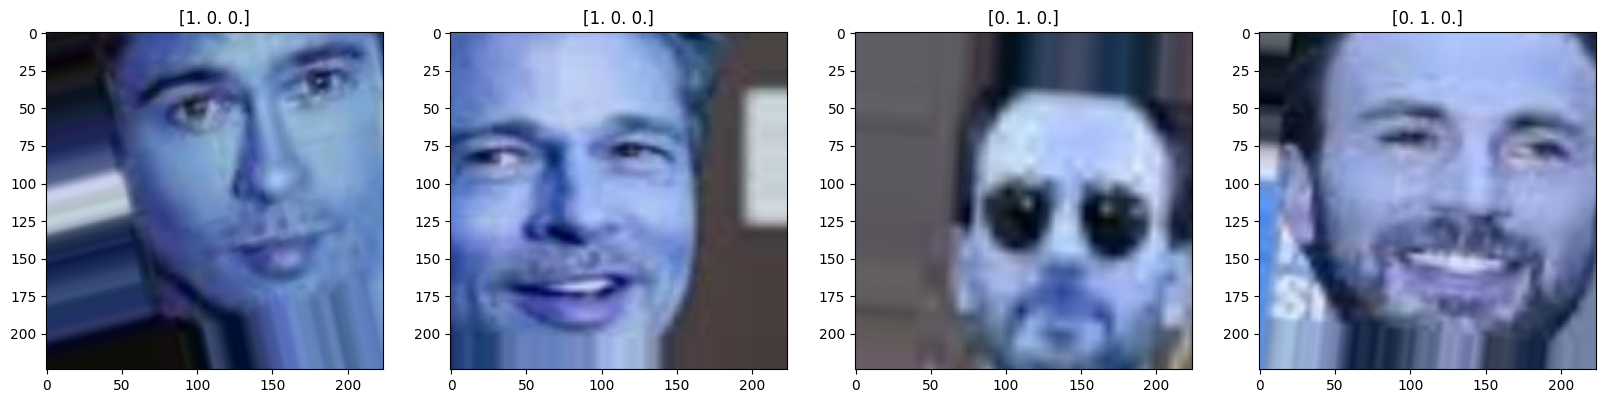

In [50]:
import matplotlib.pyplot as plt
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [15]:
vgg = VGG16(input_shape=(img_width,img_height,3),weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs= vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
hist = model.fit_generator(train_generator,validation_data=validation_generator,epochs=25,
                           steps_per_epoch=len(train_generator),validation_steps=len(validation_generator))

<ipython-input-19-3b1184a35846>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,validation_data=validation_generator,epochs=25,


Epoch 1/25
28/28 [==============================] - 34s 752ms/step - loss: 1.1826 - accuracy: 0.4713 - val_loss: 0.8172 - val_accuracy: 0.6090
Epoch 2/25
28/28 [==============================] - 13s 466ms/step - loss: 0.8549 - accuracy: 0.6088 - val_loss: 0.6178 - val_accuracy: 0.7436
Epoch 3/25
28/28 [==============================] - 13s 460ms/step - loss: 0.7175 - accuracy: 0.6900 - val_loss: 0.6467 - val_accuracy: 0.7372
Epoch 4/25
28/28 [==============================] - 13s 465ms/step - loss: 0.6863 - accuracy: 0.7125 - val_loss: 0.5222 - val_accuracy: 0.7885
Epoch 5/25
28/28 [==============================] - 13s 465ms/step - loss: 0.6111 - accuracy: 0.7396 - val_loss: 0.5111 - val_accuracy: 0.8141
Epoch 6/25
28/28 [==============================] - 13s 466ms/step - loss: 0.5601 - accuracy: 0.7734 - val_loss: 0.4989 - val_accuracy: 0.8013
Epoch 7/25
28/28 [==============================] - 13s 460ms/step - loss: 0.5530 - accuracy: 0.7655 - val_loss: 0.6446 - val_accuracy: 0.7692

In [20]:
model.save('vggface_model.h5')

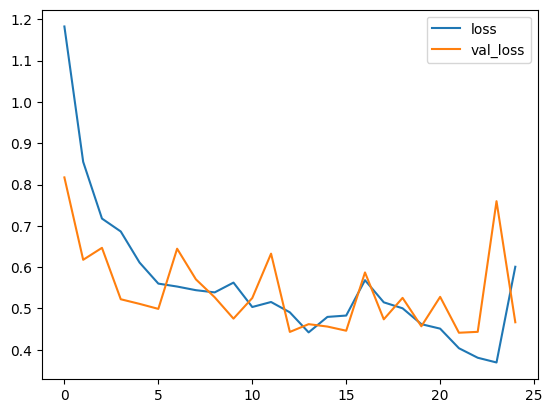

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('loss-val_loss')

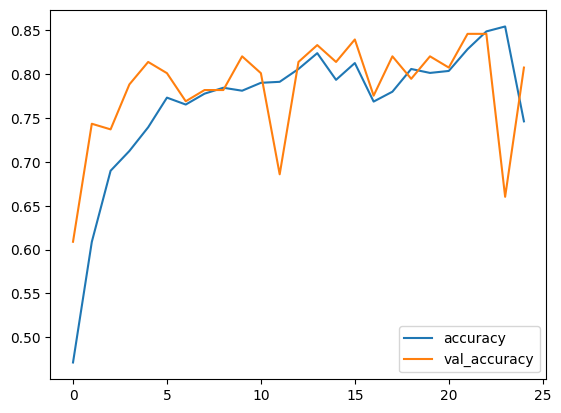

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy-val_accuracy')

In [ ]:
def test_images(model, image_generator, class_labels):
    total_samples = len(image_generator)

    correct_predictions = 0
    for i in range(total_samples):
        batch_images, batch_labels = next(image_generator)
        predictions = model.predict(batch_images)

        predicted_class_idx = np.argmax(predictions[0])
        true_class_idx = np.argmax(batch_labels)

        if predicted_class_idx == true_class_idx:
            correct_predictions += 1

        print(f"Image {i+1}/{total_samples}: Predicted class: {class_labels[predicted_class_idx]}")

    accuracy = correct_predictions / total_samples * 100
    print(f"Accuracy: {accuracy:.2f}%")

In [23]:
class_labels = list(validation_generator.class_indices.keys())


In [24]:
class_labels

['brad pitt', 'chris evans', 'tom criuse']

In [26]:
from sklearn.metrics import classification_report

def test_images(model, image_generator, class_labels):
    total_samples = len(image_generator)
    true_labels = []
    predicted_labels = []

    for i in range(total_samples):
        batch_images, batch_labels = next(image_generator)
        predictions = model.predict(batch_images)

        predicted_class_idx = np.argmax(predictions[0])
        true_class_idx = np.argmax(batch_labels)

        predicted_class_label = class_labels[predicted_class_idx]
        true_class_label = class_labels[true_class_idx]

        predicted_labels.append(predicted_class_label)
        true_labels.append(true_class_label)

        print(f"Image {i+1}/{total_samples}: Predicted class: {predicted_class_label}")

    accuracy = np.sum(np.array(predicted_labels) == np.array(true_labels)) / total_samples * 100
    print(f"Accuracy: {accuracy:.2f}%")

    # Calculate classification report
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print("Classification Report:\n", report)

# Test the images using the VGG16 model
test_images(model, validation_generator, class_labels)


1/1 [==============================] - 0s 29ms/step
Image 1/5: Predicted class: chris evans
1/1 [==============================] - 0s 38ms/step
Image 2/5: Predicted class: brad pitt
1/1 [==============================] - 0s 40ms/step
Image 3/5: Predicted class: tom criuse
1/1 [==============================] - 0s 143ms/step
Image 4/5: Predicted class: tom criuse
1/1 [==============================] - 0s 34ms/step
Image 5/5: Predicted class: brad pitt
Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

   brad pitt       1.00      1.00      1.00         2
 chris evans       1.00      1.00      1.00         1
  tom criuse       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

